In [113]:
%matplotlib inline
%load_ext autoreload
%autoreload 5
%autosave 15

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import pickle

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Autosaving every 15 seconds


In [2]:
data = pd.read_csv("train.data.cvs")
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)

In [3]:
test = pd.read_csv("testset.cvs")
test.replace([np.inf, -np.inf], np.nan, inplace=True)
test.fillna(0, inplace=True)

In [43]:
data.head(100000).to_csv('traincutted.csv', index=False)
#data = pd.read_csv('traincutted.csv')

In [4]:
print(data['QID'].nunique())
print(data['Y'].nunique())
print(test['QID'].nunique())
print(test['Y'].nunique())
print(data['QID'].append(test['QID']).nunique())
print(data['Y'].append(test['Y']).nunique())
print("")
print("")
print(data['QID'].count())
print(data['Y'].count())
print(test['QID'].count())
print(test['Y'].count())
print(data['QID'].append(test['QID']).count())
print(data['Y'].append(test['Y']).count())

6000
22332
2000
1
8000
22333


723412
723412
241521
241521
964933
964933


In [14]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X128,X129,X130,X131,X132,X133,X134,X135,X136,QID
count,723412.000000,723412.000000,723412.000000,723412.000000,723412.000000,723412.000000,723412.000000,723412.000000,723412.000000,723412.000000,...,7.234120e+05,723412.000000,723412.000000,723412.000000,723412.000000,723412.000000,7.234120e+05,7.234120e+05,7.234120e+05,723412.000000
mean,62436.896701,1.892432,0.206234,1.165337,0.552764,1.940141,0.801921,0.099071,0.539538,0.287255,...,8.795388e+04,4.346108,19624.441616,35977.949347,17.480224,24.400819,2.074976e+02,4.593567e+02,1.824343e+04,14860.391578
std,77803.234690,1.285651,0.574290,1.020350,0.792153,1.253191,0.342163,0.268240,0.422205,0.396127,...,7.517011e+06,8.999397,22358.355520,21321.986438,30.415896,41.286386,2.830124e+04,1.939316e+04,3.456017e+06,8289.976558
min,1.098610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.083778e+09,0.000000,100.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,9.540650,1.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,1216.000000,16257.750000,2.000000,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,8041.000000
50%,10.245300,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.500000,0.000000,...,4.000000e+00,1.000000,8275.000000,39657.000000,6.000000,7.000000,0.000000e+00,0.000000e+00,0.000000e+00,15109.000000
75%,99643.500000,3.000000,0.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.500000,...,6.100000e+01,4.000000,35947.250000,55073.000000,18.000000,23.000000,0.000000e+00,1.000000e+00,4.000000e-01,21646.000000
max,412352.000000,75.000000,7.000000,15.000000,15.000000,75.000000,1.000000,1.000000,1.000000,1.000000,...,3.141316e+08,178.000000,65534.000000,65535.000000,254.000000,254.000000,1.315019e+07,2.789632e+06,9.800000e+08,29992.000000


In [9]:
test.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X128,X129,X130,X131,X132,X133,X134,X135,X136,QID
count,241521.0,241521.000000,241521.000000,241521.000000,241521.000000,241521.000000,241521.000000,241521.000000,241521.000000,241521.000000,...,2.415210e+05,241521.000000,241521.000000,241521.000000,241521.000000,241521.000000,2.415210e+05,2.415210e+05,2.415210e+05,241521.000000
mean,-1.0,1.870533,0.205696,1.156264,0.559082,1.921001,0.800374,0.099792,0.540521,0.293883,...,1.258459e+05,4.371918,20265.874545,36419.387279,17.496665,23.782098,1.606433e+02,4.139032e+02,2.535028e+04,14734.128349
std,0.0,1.239889,0.569612,1.019505,0.801676,1.204463,0.346106,0.270067,0.425366,0.400673,...,3.423648e+06,8.992027,22693.710770,21138.484407,30.368625,40.534728,1.180004e+04,1.653346e+04,4.269920e+06,8204.599393
min,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,114.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,13.000000
25%,-1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,1336.000000,17181.000000,2.000000,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,8068.000000
50%,-1.0,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.500000,0.000000,...,4.000000e+00,1.000000,8808.000000,40462.000000,6.000000,7.000000,0.000000e+00,0.000000e+00,0.000000e+00,14893.000000
75%,-1.0,3.000000,0.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.500000,...,6.100000e+01,4.000000,37704.000000,55125.000000,18.000000,22.000000,0.000000e+00,1.000000e+00,1.000000e+00,21358.000000
max,-1.0,9.000000,6.000000,9.000000,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,...,3.141316e+08,166.000000,65535.000000,65535.000000,254.000000,254.000000,4.056445e+06,1.731553e+06,9.000000e+08,29998.000000


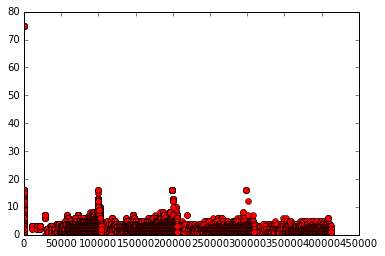

In [17]:
plt.plot(data['Y'].values, data['X1'].values, 'ro')

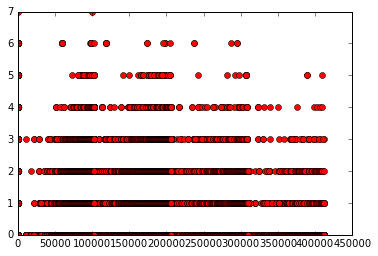

In [18]:
plt.plot(data['Y'].values, data['X2'].values, 'ro')

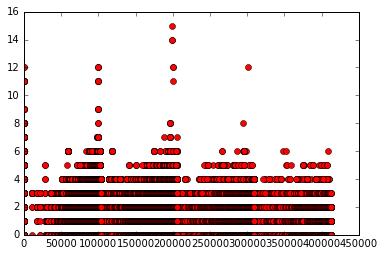

In [19]:
plt.plot(data['Y'].values, data['X3'].values, 'ro')

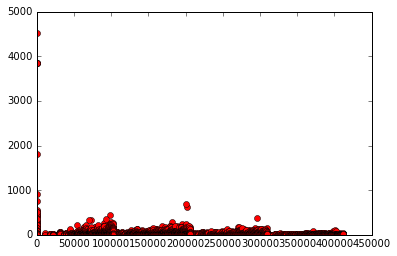

In [21]:
plt.plot(data['Y'].values, data['X30'].values, 'ro')

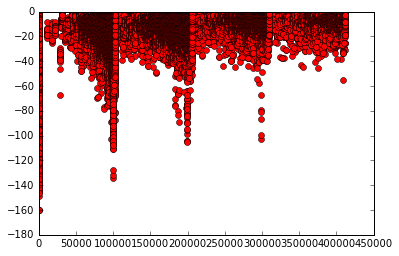

In [22]:
plt.plot(data['Y'].values, data['X115'].values, 'ro')

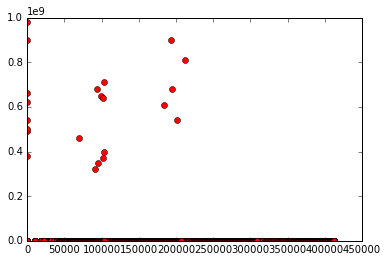

In [23]:
plt.plot(data['Y'].values, data['X136'].values, 'ro')

In [4]:
mn = {}
std = {}
for col in data.columns.drop(['QID', 'Y']):
    c = data[col].append(test[col])
    mn[col] = c.mean()
    std[col] = c.std()
    data[col] = pd.Series(map(lambda x: (x - mn[col]) / std[col], data[col]))
    test[col] = pd.Series(map(lambda x: (x - mn[col]) / std[col], test[col]))
    del c
mny = data['Y'].mean()
stdy = data['Y'].std()
data['Y'] = pd.Series(map(lambda x: (x - mny) / stdy, data['Y']))
del mn
del std

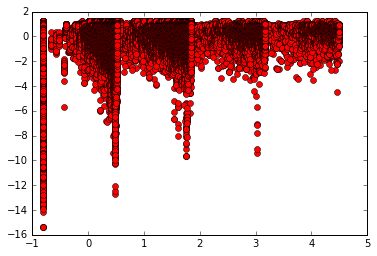

In [25]:
plt.plot(data['Y'].values, data['X115'].values, 'ro')

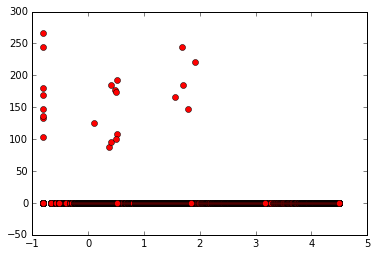

In [26]:
plt.plot(data['Y'].values, data['X136'].values, 'ro')

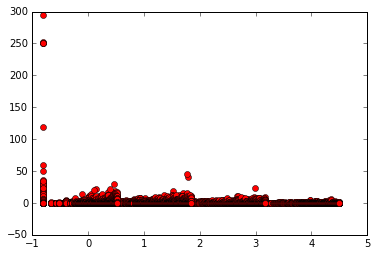

In [27]:
plt.plot(data['Y'].values, data['X30'].values, 'ro')

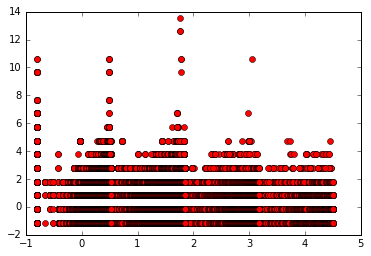

In [28]:
plt.plot(data['Y'].values, data['X3'].values, 'ro')

In [6]:
Y = data['Y'].values
X = data.drop(['Y', 'QID'], axis=1).values
del data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
del X 
del Y

In [40]:
clf = GradientBoostingRegressor(verbose=1, n_estimators=300, learning_rate = 0.3, max_depth = 5)
clf.fit(X_train, y_train)
print(mean_squared_error(y_test, clf.predict(X_test)))
clf = GradientBoostingRegressor(verbose=1, n_estimators=100, learning_rate = 0.3, max_depth = 5)
clf.fit(X_train, y_train)
print(mean_squared_error(y_test, clf.predict(X_test)))
clf = GradientBoostingRegressor(verbose=1, n_estimators=40, learning_rate = 0.3, max_depth = 5)
clf.fit(X_train, y_train)
print(mean_squared_error(y_test, clf.predict(X_test)))
clf = GradientBoostingRegressor(verbose=1, n_estimators=15, learning_rate = 0.3, max_depth = 5)
clf.fit(X_train, y_train)
print(mean_squared_error(y_test, clf.predict(X_test)))
clf = GradientBoostingRegressor(verbose=1, n_estimators=5, learning_rate = 0.3, max_depth = 5)
clf.fit(X_train, y_train)
print(mean_squared_error(y_test, clf.predict(X_test)))

      Iter       Train Loss   Remaining Time 
         1  3551619961.7691            3.07m
         2  3352355912.2955            3.02m
         3  3227772960.6210            2.98m
         4  3138492239.9541            2.96m
         5  3060713323.7500            2.99m
         6  3000465381.3894            2.99m
         7  2951538951.4665            2.98m
         8  2920870340.3436            2.96m
         9  2882438814.5262            2.95m
        10  2849167808.0520            2.95m
        20  2658385068.1265            2.71m
        30  2517959123.0119            2.54m
        40  2404846981.0918            2.39m
        50  2302229589.7281            2.29m
        60  2190346426.2682            2.19m
        70  2103613973.7770            2.09m
        80  2010695872.9738            2.00m
        90  1932885108.7672            1.91m
       100  1872866860.2386            1.80m
       200  1334668391.4945           53.47s
       300   990281673.4426            0.00s
318190050

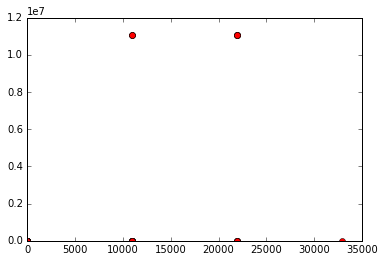

In [55]:
fi = data[(data['QID'] == 1)]
plt.plot(fi['Y'].values, fi['X128'].values, 'ro')

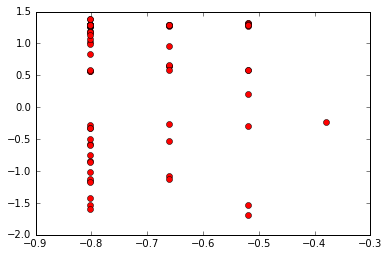

In [58]:
fi = data[(data['QID'] == 1)]
plt.plot(fi['Y'].values, fi['X131'].values, 'ro')

In [13]:
fi.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X128,X129,X130,X131,X132,X133,X134,X135,X136,QID
0,-0.520076,1.078761,4.014072,-0.768259,-0.470506,1.061452,0.586644,1.665610,-0.609747,-0.351485,...,1.693661,-0.156731,-0.690359,1.533961,-0.003833,-0.410125,-0.006348,-0.020508,-0.004571,1
1,-0.520076,1.078761,-0.217857,1.874875,-0.470506,1.061452,0.586644,-0.134616,0.896066,-0.351485,...,1.693661,-0.156731,-0.689981,1.533961,-0.441675,-0.436947,-0.006348,-0.020508,-0.004571,1
2,-0.802483,1.078761,-0.217857,0.993830,-0.470506,1.061452,0.586644,-0.134616,0.394129,-0.351485,...,-0.010130,-0.281238,-0.689981,-0.977990,0.032654,1.306496,-0.006348,-0.020508,-0.004571,1
3,-0.520076,1.078761,-0.217857,1.874875,-0.470506,1.061452,0.586644,-0.134616,0.896066,-0.351485,...,1.693661,1.212837,-0.690028,1.529780,-0.441675,-0.410125,-0.006348,-0.020508,-0.004571,1
4,-0.661280,1.078761,-0.217857,1.874875,-0.470506,1.061452,0.586644,-0.134616,0.896066,-0.351485,...,-0.010130,0.465800,-0.683738,0.940554,-0.441675,-0.141903,-0.006348,-0.020508,-0.004571,1


In [15]:
fi.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X128,X129,X130,X131,X132,X133,X134,X135,X136,QID
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,...,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,-0.731881,0.944177,-0.021023,1.290927,-0.260032,0.925940,0.489921,-0.050885,0.563386,-0.251719,...,0.148430,1.273643,-0.074020,0.881660,-0.176085,-0.078902,-0.004600,-0.018596,-0.004569,1.0
std,0.109911,0.428310,0.842582,0.951897,0.705142,0.431263,0.307819,0.358427,0.542303,0.334243,...,0.497772,1.667339,0.718744,0.851325,0.614572,0.710194,0.015734,0.009811,0.000007,0.0
min,-0.802483,-0.963748,-0.217857,-0.768259,-0.470506,-0.995138,-0.881271,-0.134616,-0.609747,-0.351485,...,-0.010131,-0.405744,-0.690407,-1.107996,-0.441675,-0.436947,-0.006348,-0.020508,-0.004571,1.0
25%,-0.802483,1.078761,-0.217857,0.993830,-0.470506,1.061452,0.586644,-0.134616,0.394129,-0.351485,...,-0.010131,-0.281238,-0.682567,0.140354,-0.441675,-0.403420,-0.006348,-0.020508,-0.004571,1.0
50%,-0.802483,1.078761,-0.217857,1.874875,-0.470506,1.061452,0.586644,-0.134616,0.896066,-0.351485,...,-0.010130,0.465800,-0.364559,1.427402,-0.368701,-0.383303,-0.006348,-0.020508,-0.004571,1.0
75%,-0.661280,1.078761,-0.217857,1.874875,-0.470506,1.061452,0.586644,-0.134616,0.896066,-0.351485,...,-0.010128,3.329444,0.431792,1.516825,-0.304849,-0.141903,-0.006348,-0.020508,-0.004571,1.0
max,-0.378871,1.078761,4.014072,1.874875,2.923380,1.061452,0.586644,1.665610,0.896066,1.257245,...,1.693661,4.823519,2.195186,1.596087,3.207004,3.935071,0.139582,0.041245,-0.004528,1.0


In [18]:
fi = data[(data['QID'] == 4)]
fi.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X128,X129,X130,X131,X132,X133,X134,X135,X136,QID
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.0
mean,-0.661615,0.880459,0.069750,0.951061,0.122600,0.868439,0.444128,-0.012271,0.369762,-0.070348,...,-0.010068,0.191403,-0.345900,-0.783939,1.037988,1.416649,-0.006343,-0.019071,-0.004568,4.0
std,0.183083,0.351984,0.635763,0.783950,0.907869,0.351623,0.252964,0.270448,0.446622,0.430338,...,0.000146,0.546994,0.602481,0.376532,1.816803,1.450544,0.000034,0.005407,0.000005,0.0
min,-0.802474,-0.282911,-0.217857,-0.768259,-0.470506,-0.309608,-0.391966,-0.134616,-0.609747,-0.351485,...,-0.010131,-0.405744,-0.690407,-1.114370,-0.405188,-0.383303,-0.006348,-0.020508,-0.004571,4.0
25%,-0.802474,0.397925,-0.217857,0.993830,-0.470506,0.718687,0.097340,-0.134616,0.394129,-0.351485,...,-0.010131,-0.281238,-0.688609,-1.017766,-0.113294,0.005619,-0.006348,-0.020508,-0.004571,4.0
50%,-0.802474,1.078761,-0.217857,0.993830,-0.470506,1.061452,0.586644,-0.134616,0.394129,-0.351485,...,-0.010127,0.092281,-0.656259,-0.871535,0.288061,1.306496,-0.006348,-0.020508,-0.004571,4.0
75%,-0.572181,1.078761,-0.217857,1.874875,0.660789,1.061452,0.586644,-0.134616,0.896066,0.184758,...,-0.010074,0.465800,-0.283753,-0.716034,1.291448,2.553728,-0.006348,-0.020478,-0.004571,4.0
max,-0.111593,1.078761,2.603429,1.874875,2.923380,1.061452,0.586644,1.065535,0.896066,1.257245,...,-0.009366,1.710862,2.139518,1.408218,8.497587,4.712915,-0.006103,0.020284,-0.004536,4.0


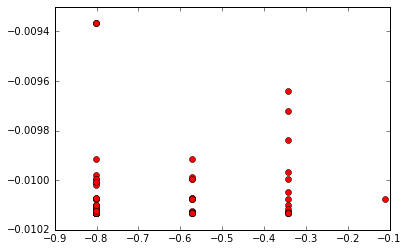

In [19]:
plt.plot(fi['Y'].values, fi['X128'].values, 'ro')

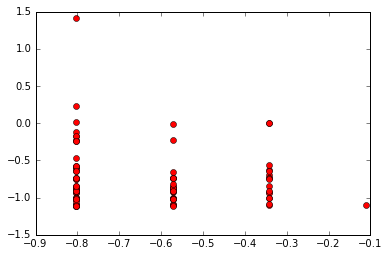

In [20]:
plt.plot(fi['Y'].values, fi['X131'].values, 'ro')

In [7]:
clf = GradientBoostingRegressor(verbose=1, n_estimators=15, learning_rate = 0.3, max_depth = 3)
clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1  5734994028.2888            2.15m
         2  5550889976.3170            2.01m
         3  5445365316.3920            1.86m
         4  5367927267.7856            1.70m
         5  5313154056.1685            1.53m
         6  5274506186.9617            1.37m
         7  5243619729.1033            1.21m
         8  5215141645.0262            1.06m
         9  5193509198.9454           54.50s
        10  5174108557.4181           45.30s


GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.3, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=15, presort='auto',
             random_state=None, subsample=1.0, verbose=1, warm_start=False)

In [8]:
print(mean_squared_error(y_test, clf.predict(X_test)))

5138062380.82


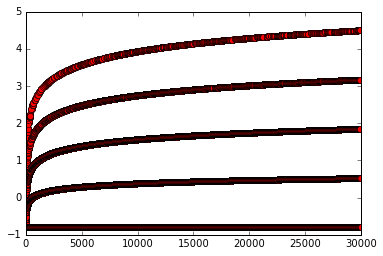

In [31]:
plt.plot(data['QID'].values, data['Y'].values, 'ro')

In [43]:
del X_train
del y_train
del X_test
del y_test

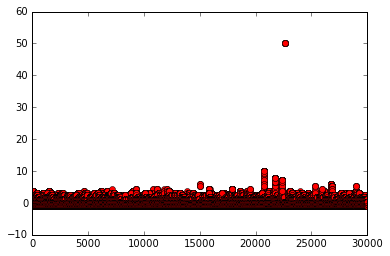

In [44]:
plt.plot(data['QID'].values, data['X1'].values, 'ro')

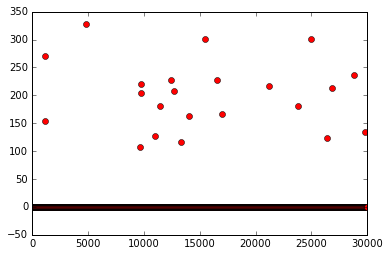

In [45]:
plt.plot(data['QID'].values, data['X136'].values, 'ro')

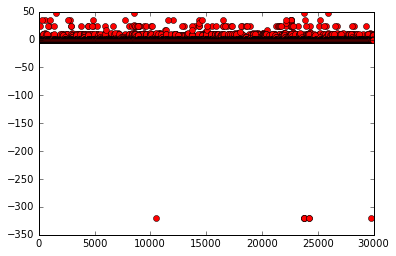

In [46]:
plt.plot(data['QID'].values, data['X128'].values, 'ro')

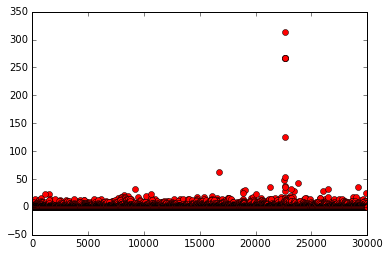

In [47]:
plt.plot(data['QID'].values, data['X30'].values, 'ro')

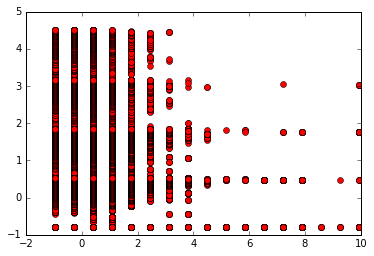

In [49]:
fi = data[(data['X1'] < 20)]
plt.plot(fi['X1'].values, fi['Y'].values, 'ro')

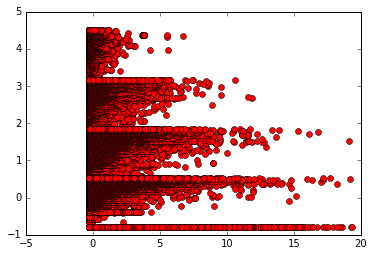

In [50]:
fi = data[(data['X30'] < 20)]
plt.plot(fi['X30'].values, fi['Y'].values, 'ro')

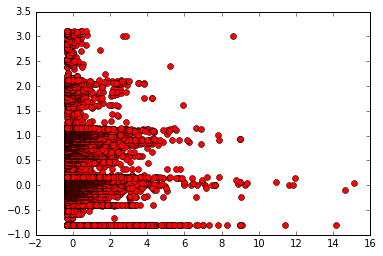

In [53]:
fi = data[((data['X30'] < 20) & (data['QID'] < 2000))]
plt.plot(fi['X30'].values, fi['Y'].values, 'ro')

In [14]:
Y = data['Y'].values
X = data.drop(['Y', 'QID'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
del X 
del Y
clf = GradientBoostingRegressor(verbose=1, n_estimators=100, learning_rate = 0.3, max_depth = 4)
clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9410           23.63m
         2           0.9075           23.37m
         3           0.8892           22.78m
         4           0.8749           22.50m
         5           0.8648           22.45m
         6           0.8572           22.30m
         7           0.8518           21.91m
         8           0.8472           21.63m
         9           0.8440           21.24m
        10           0.8406           20.99m
        20           0.8235           18.35m
        30           0.8143           15.86m
        40           0.8077           13.25m
        50           0.8020           10.74m
        60           0.7976            8.45m
        70           0.7928            6.39m
        80           0.7887            4.31m
        90           0.7853            2.13m
       100           0.7812            0.00s


GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.3, loss='ls',
             max_depth=4, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=1,
             warm_start=False)

In [16]:
clf.feature_importances_

array([  1.02453154e-03,   8.15294486e-04,   2.35299105e-03,
         7.75403206e-04,   6.95061153e-04,   2.23142133e-03,
         1.34838023e-03,   2.39981978e-03,   7.01674952e-04,
         3.78717130e-04,   2.45237925e-02,   7.74959020e-03,
         1.50780061e-02,   1.98729582e-02,   2.10513018e-02,
         2.60540129e-02,   2.27450408e-02,   2.11629427e-02,
         2.22776774e-02,   2.05659161e-02,   4.10709938e-04,
         0.00000000e+00,   6.68611476e-04,   1.20847534e-03,
         3.19272571e-03,   1.36082481e-03,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.39335772e-02,
         1.68057979e-03,   2.40919051e-07,   2.13094530e-03,
         0.00000000e+00,   1.00068249e-03,   1.16910772e-03,
         4.18676273e-04,   9.69042512e-04,   0.00000000e+00,
         8.62491129e-04,   3.66894637e-03,   1.03742173e-03,
         3.04349319e-03,   3.13555799e-04,   4.81805913e-03,
         7.15010037e-03,   1.78716128e-03,   7.40212409e-03,
         4.93780170e-03,

In [17]:
del clf
del X_train
del y_train
del X_test
del y_test
Y = data['Y'].values
X = data.drop(['Y'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
del X 
del Y
clf = GradientBoostingRegressor(verbose=1, n_estimators=100, learning_rate = 0.3, max_depth = 4)
clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9397           24.85m
         2           0.9041           24.77m
         3           0.8826           24.25m
         4           0.8678           23.79m
         5           0.8576           23.36m
         6           0.8490           23.16m
         7           0.8424           22.81m
         8           0.8379           22.40m
         9           0.8336           22.01m
        10           0.8291           21.76m
        20           0.8085           19.51m
        30           0.7980           16.95m
        40           0.7913           14.33m
        50           0.7848           11.85m
        60           0.7794            9.61m
        70           0.7766            7.17m
        80           0.7723            4.72m
        90           0.7686            2.34m
       100           0.7658            0.00s


GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.3, loss='ls',
             max_depth=4, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=1,
             warm_start=False)

In [19]:
clf.feature_importances_

array([  2.26248121e-03,   0.00000000e+00,   6.71851025e-04,
         1.21527852e-03,   1.11500596e-03,   2.65409803e-03,
         7.65395495e-04,   3.68386711e-03,   3.32756289e-04,
         0.00000000e+00,   2.76361757e-02,   6.24918337e-03,
         1.50207658e-02,   2.18710388e-02,   1.75214113e-02,
         2.21322477e-02,   1.59395150e-02,   1.92243249e-02,
         1.92657265e-02,   1.98004936e-02,   1.52009266e-03,
         2.04011649e-03,   1.00245785e-03,   0.00000000e+00,
         2.76187949e-03,   8.98866372e-04,   1.56251049e-03,
         0.00000000e+00,   0.00000000e+00,   1.44076708e-02,
         8.27311820e-04,   0.00000000e+00,   1.57490579e-03,
         0.00000000e+00,   2.78644731e-03,   3.16382694e-03,
         2.47463760e-04,   1.93014634e-03,   7.12678339e-04,
         3.52387961e-03,   2.15108462e-03,   6.10602273e-04,
         2.63977002e-03,   0.00000000e+00,   3.11104500e-03,
         2.86500824e-03,   5.00839675e-03,   9.47864322e-03,
         3.81081703e-03,

In [20]:
del X_train
del y_train
del X_test
del y_test

In [21]:
X = data.drop(['Y'], axis=1).values
Y = clf.predict(X)

In [27]:
data.Y = Y

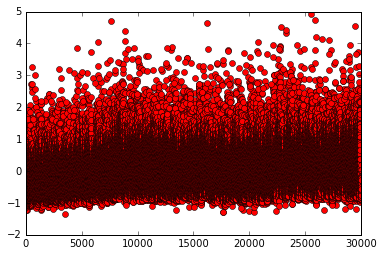

In [28]:
plt.plot(data['QID'].values, data['Y'].values, 'ro')

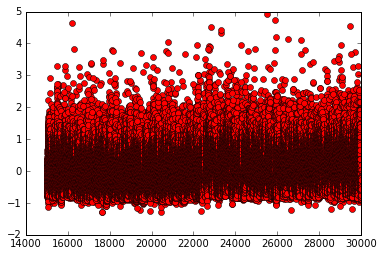

In [31]:
fi = data[(data['QID'] > 15000)]
plt.plot(fi['QID'].values, fi['Y'].values, 'ro')

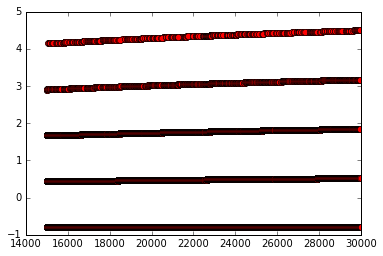

In [5]:
fi = data[(data['QID'] > 15000)]
plt.plot(fi['QID'].values, fi['Y'].values, 'ro')

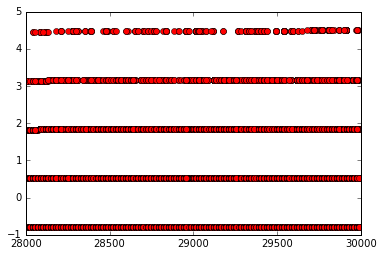

In [6]:
fi = data[(data['QID'] > 28000)]
plt.plot(fi['QID'].values, fi['Y'].values, 'ro')

(array([ 378410.,   22716.,  210659.,    8875.,   85248.,     891.,
           5061.,    6817.,    1136.,    3599.]),
 array([-0.80248332, -0.27249134,  0.25750063,  0.78749261,  1.31748459,
         1.84747656,  2.37746854,  2.90746052,  3.43745249,  3.96744447,
         4.49743645]),
 <a list of 10 Patch objects>)

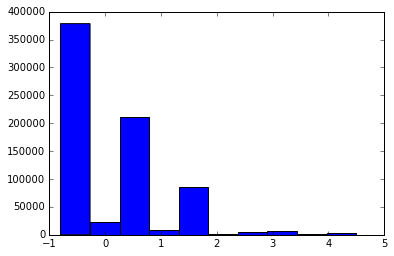

In [7]:
plt.hist(data.Y)

(array([  183.,     0.,   394.,     0.,     0.,  1687.,     0.,  2361.,
            0.,  1375.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

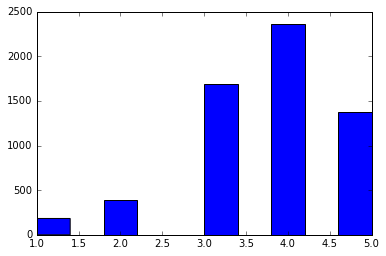

In [11]:
plt.hist(data.groupby('QID')['Y'].nunique())

(array([  62489.,    1539.,    3416.,   10128.,    1950.,   62054.,
          32515.,   13496.,    6019.,  529806.]),
 array([-2.65918814, -2.3400404 , -2.02089266, -1.70174492, -1.38259718,
        -1.06344944, -0.7443017 , -0.42515395, -0.10600621,  0.21314153,
         0.53228927]),
 <a list of 10 Patch objects>)

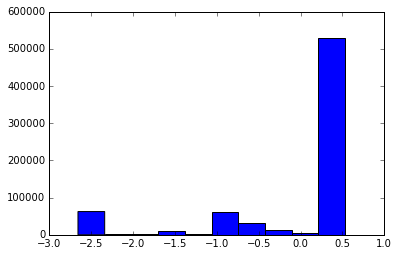

In [12]:
plt.hist(data.X10)

(array([  4.33233000e+05,   3.13000000e+02,   3.85300000e+03,
          1.13150000e+04,   1.69220000e+04,   2.25840000e+04,
          2.92080000e+04,   3.28240000e+04,   2.82920000e+04,
          1.44868000e+05]),
 array([-0.77749374, -0.54131242, -0.30513111, -0.06894979,  0.16723152,
         0.40341284,  0.63959416,  0.87577547,  1.11195679,  1.3481381 ,
         1.58431942]),
 <a list of 10 Patch objects>)

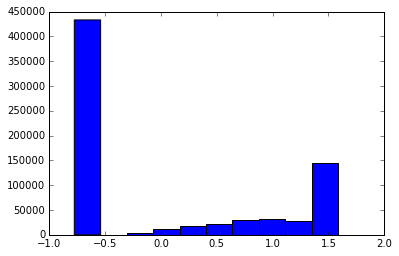

In [13]:
plt.hist(data.X104)

(array([  98127.,   58644.,   48961.,   47881.,   51366.,   53738.,
          67858.,   80162.,   94623.,  122052.]),
 array([-1.69607324, -1.38807007, -1.08006689, -0.77206371, -0.46406053,
        -0.15605735,  0.15194583,  0.45994901,  0.76795219,  1.07595537,
         1.38395855]),
 <a list of 10 Patch objects>)

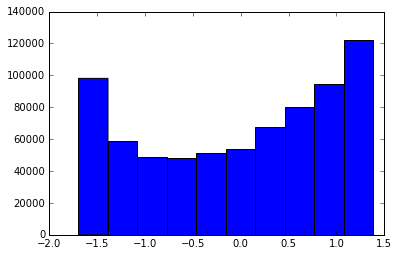

In [19]:
plt.hist(data.X131)

In [6]:
data = data.groupby('QID').apply(lambda x: x.sort_values(['Y'], ascending = False)).reset_index(drop=True)

In [19]:
data.head(100)['Y']

0     32959.50000
1     21973.30000
2     21973.30000
3     21973.30000
4     21973.30000
5     21973.30000
6     21973.30000
7     21973.30000
8     21973.30000
9     21973.30000
10    21973.30000
11    21973.30000
12    21973.30000
13    10987.20000
14    10987.20000
15    10987.20000
16    10987.20000
17    10987.20000
18    10987.20000
19    10987.20000
20    10987.20000
21    10987.20000
22    10987.20000
23    10987.20000
24    10987.20000
25    10987.20000
26    10987.20000
27    10987.20000
28    10987.20000
29        1.09861
         ...     
70        1.09861
71        1.09861
72        1.09861
73        1.09861
74        1.09861
75        1.09861
76        1.09861
77        1.09861
78        1.09861
79        1.09861
80        1.09861
81        1.09861
82        1.09861
83        1.09861
84        1.09861
85        1.09861
86    53754.60000
87    35837.00000
88    35837.00000
89    35837.00000
90    35837.00000
91    35837.00000
92    35837.00000
93    35837.00000
94    3583

In [7]:
YAv = [1.09861, 10987.20000, 21973.30000, 32959.50000, 53754.60000]
YAv

[1.09861, 10987.2, 21973.3, 32959.5, 53754.6]

In [8]:
def mini(entry):
    minvi = 500000
    mini = 0
    for (k, vi) in enumerate(YAv):
        if ((abs(entry - vi) <= minvi) & (entry > vi)):
            minvi = abs(entry - vi)
            mini = k
    return mini

In [24]:
mini(40000)

3

In [9]:
lq = -1
for (i, row) in data.iterrows():
    QID = int(row.QID)
    if (lq < QID):
        lq = QID
        fi = data[(data['QID'] == QID)].Y.unique()      
        if (len(fi) > 4):
            YAv = fi
        else:
            for (j, entry) in enumerate(fi):
                k = mini(entry)
                YAv[k] = entry
    data['Y'][i] = mini(row.Y)   

/home/timur/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


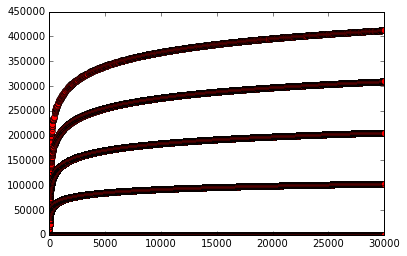

In [9]:
plt.plot(data['QID'].values, data['Y'].values, 'ro')

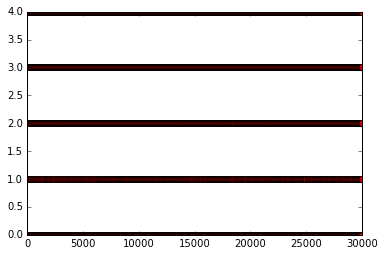

In [10]:
plt.plot(data['QID'].values, data['Y'].values, 'ro')

In [17]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X128,X129,X130,X131,X132,X133,X134,X135,X136,QID
count,723412.000000,723412.000000,723412.000000,723412.000000,723412.000000,723412.000000,723412.000000,723412.000000,723412.000000,723412.000000,...,7.234120e+05,723412.000000,723412.000000,723412.000000,723412.000000,723412.000000,7.234120e+05,7.234120e+05,7.234120e+05,723412.000000
mean,62436.896701,1.892432,0.206234,1.165337,0.552764,1.940141,0.801921,0.099071,0.539538,0.287255,...,8.795388e+04,4.346108,19624.441616,35977.949347,17.480224,24.400819,2.074976e+02,4.593567e+02,1.824343e+04,14860.391578
std,77803.234690,1.285651,0.574290,1.020350,0.792153,1.253191,0.342163,0.268240,0.422205,0.396127,...,7.517011e+06,8.999397,22358.355520,21321.986438,30.415896,41.286386,2.830124e+04,1.939316e+04,3.456017e+06,8289.976558
min,1.098610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.083778e+09,0.000000,100.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,9.540650,1.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,1216.000000,16257.750000,2.000000,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,8041.000000
50%,10.245300,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.500000,0.000000,...,4.000000e+00,1.000000,8275.000000,39657.000000,6.000000,7.000000,0.000000e+00,0.000000e+00,0.000000e+00,15109.000000
75%,99643.500000,3.000000,0.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.500000,...,6.100000e+01,4.000000,35947.250000,55073.000000,18.000000,23.000000,0.000000e+00,1.000000e+00,4.000000e-01,21646.000000
max,412352.000000,75.000000,7.000000,15.000000,15.000000,75.000000,1.000000,1.000000,1.000000,1.000000,...,3.141316e+08,178.000000,65534.000000,65535.000000,254.000000,254.000000,1.315019e+07,2.789632e+06,9.800000e+08,29992.000000


In [11]:
data.to_csv('trainSNA.csv', index=False)
test.to_csv('testSN.csv', index=False)

In [13]:
Y = data['Y'].values
X = data.drop(['Y', 'QID'], axis=1).values
clf = GradientBoostingRegressor(verbose=1, n_estimators=100, learning_rate = 0.3, max_depth = 4)
clf.fit(X, Y)

      Iter       Train Loss   Remaining Time 
         1           3.2538           30.19m
         2           3.1583           30.83m
         3           3.1009           30.46m
         4           3.0642           30.14m
         5           3.0423           29.81m
         6           3.0270           29.54m
         7           3.0147           29.35m
         8           3.0056           29.27m
         9           2.9994           28.69m
        10           2.9942           28.21m
        20           2.9593           24.36m
        30           2.9408           21.02m
        40           2.9261           17.89m
        50           2.9126           14.71m
        60           2.9016           11.78m
        70           2.8907            8.79m
        80           2.8807            5.83m
        90           2.8735            2.90m
       100           2.8659            0.00s


GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.3, loss='ls',
             max_depth=4, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=1,
             warm_start=False)

In [6]:
res = clf.predict(test.drop(['Y', 'QID'], axis=1))
test['Y'] = res

In [7]:
numOfDocs = 5
numOfQueries = len(test.QID.unique())
print(numOfQueries)

with open('subm.csv', 'w') as output:
    output.write('DocumentId,QueryId\n')
    QIDArray = [0] * (test.QID.max() + 1)
    for (i, row) in test.sort_values('Y', ascending=False).iterrows():
        QID = int(row.QID)
        if (QIDArray[QID] < numOfDocs):
            QIDArray[QID] += 1
            output.write("%d,%d\n" % (i + 1,QID))


2000


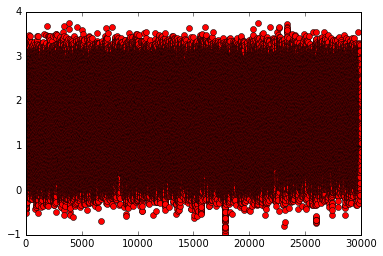

In [17]:
res = data
res['Y'] = clf.predict(X)
plt.plot(res['QID'].values, res['Y'].values, 'ro')

In [18]:
Y = data['Y'].values
X = data.drop(['Y', 'QID'], axis=1).values
clf = GradientBoostingRegressor(verbose=1, n_estimators=300, learning_rate = 0.3, max_depth = 3)
clf.fit(X, Y)

      Iter       Train Loss   Remaining Time 
         1           0.3374           77.95m
         2           0.2506           71.05m
         3           0.1954           67.38m
         4           0.1636           67.12m
         5           0.1420           66.90m
         6           0.1263           67.37m
         7           0.1137           67.09m
         8           0.1053           67.03m
         9           0.0996           66.59m
        10           0.0937           66.75m
        20           0.0656           63.39m
        30           0.0539           59.72m
        40           0.0461           57.36m
        50           0.0412           54.68m
        60           0.0368           52.72m
        70           0.0333           50.46m
        80           0.0308           48.37m
        90           0.0286           46.05m
       100           0.0272           43.56m
       200           0.0180           21.80m
       300           0.0144            0.00s


GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.3, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=300,
             presort='auto', random_state=None, subsample=1.0, verbose=1,
             warm_start=False)

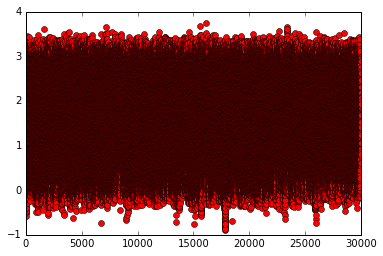

In [21]:
res = data
res['Y'] = clf.predict(X)
plt.plot(res['QID'].values, res['Y'].values, 'ro')

In [4]:
data = pd.read_csv("trainSNA.csv")
test = pd.read_csv("testSN.csv")

##### Pointwise approach maximum achievment 0.30271 (NDCG5 score)

In [5]:
def dcg(assessor_rating, rating_to_rank, k=5):
    order = np.argsort(rating_to_rank)[::-1]
    assessor_rating = np.take(assessor_rating, order[:k])
    return np.sum(2 ** assessor_rating - 1 / np.log2(np.arange(len(assessor_rating)) + 2))

In [6]:
def ndcg(assessor_rating, rating_to_rank, k=5):
    return dcg(assessor_rating, rating_to_rank, k=k) / dcg(assessor_rating, assessor_rating, k=k)

In [7]:
def avg_ndcg(query_buckets, rating_to_rank, k):
    ndcg_sum = 0
    for (indexs, assessor_rating) in query_buckets:
        ndcg_sum += ndcg_sum(assessor_rating, rating_to_rank[indexs], k)
    return ndcg_sum / len(query_buckets)

In [9]:
avg_ndcg([1, 0, 1, 4, 4], [0, 1, 2, 5, 8, 5], [0, 0, 0, 0, 1], k=7)

0.99324455359398034

In [110]:
def create_query_buckets(DATA, queries):
    features = []
    ratings = []
    last_index = 0
    all_queries = DATA[:, -1]
    for q in queries:
        features_in_bucket = DATA[all_queries == q, 1:-1]
        features.append(features_in_bucket)
        ratings.append((range(last_index, last_index + features_in_bucket.shape[0]), DATA[all_queries == q, 0]))
        last_index += features_in_bucket.shape[0]
    return ratings, np.vstack(features)

In [109]:
def dndcg(assessors_rank, rating, k=5):
    rating_order = np.empty(rating.shape)
    sort_rating = sorted(zip(rating, range(rating.shape[0])), key=lambda x: x[0], reverse=True)
    rating_order[list(map(lambda x: x[1], sort_rating))] = range(1, rating.shape[0] + 1)
    gains = 2 ** assessors_rank - 1
    discounts = np.log2(rating_order + 1)
    point_dcg = gains / discounts
    
    size = assessors_rank.shape[0]
    point_dcg_matrix = np.tile(point_dcg, (size, 1)).T
    point_swap_dcg_matrix = gains.reshape((size, 1)) / discounts.reshape((1, size))
    lambda_matrix = point_swap_dcg_matrix + point_swap_dcg_matrix.T - point_dcg_matrix - point_dcg_matrix.T
    no_null_swap = ((rating_order <= k).reshape((size, 1)) + (rating_order <= k).reshape((1, size))) > 0
    lambda_matrix = np.abs(lambda_matrix * no_null_swap)
    
    idcg = dcg(assessors_rank, assessors_rank, k)
    if idcg != 0:
        return lambda_matrix / idcg
    else:
        return lambda_matrix

In [112]:
clf = LambdaRank(learning_rate=0.6, n_estimators=700, tree_depth=3)
clf.fit(DATA=rowData)
test = pd.read_csv("testset.cvs", index_col=False).as_matrix()
res = clf.predict(test[:, 1:-1])

In [111]:
class LambdaRank:
    def __init__(self, learning_rate, n_estimators, tree_depth):
        self._learning_rate = learning_rate
        self._n_estimators = n_estimators
        self.base_model = pickle.load(open("final_mod.sav", "rb"))
        self._tree_depth = tree_depth
        self._trees = []

    def predict(self, features):
        result = self.base_model.predict(features)
        for tree in self._trees:
            result += self._learning_rate * tree.predict(features)
        return result

    def fit(self, DATA):
        self._trees = []
        train_queries = np.unique(DATA[:, -1])
        query_buckets, features = create_query_buckets(DATA, train_queries)
        rating_to_rank = self.base_model.predict(features)

        iteration = 0
        while (iteration < self._n_estimators):
            iteration += 1
            gradient = np.zeros(rating_to_rank.shape)
            for (indexs, assessor_rating) in query_buckets:
                h = rating_to_rank[indexs]
                size = h.shape[0]
                delta_h = h.reshape((size, 1)) - h.reshape((1, size))
                sign_h = np.sign(assessor_rating.reshape((size, 1)) - assessor_rating.reshape((1, size)))
                lambda_matrix = 1. / (1. + np.exp(delta_h * sign_h)) * dndcg(assessor_rating, h, 15)
                gradient[indexs] = -np.sum(sign_h * np.abs(lambda_matrix), axis=1)

            new_tree = DT(max_depth=self._tree_depth)
            new_tree.fit(features, -gradient)
            self._trees.append(new_tree)
            rating_to_rank += self._learning_rate * new_tree.predict(features)
            #print(iteration, avg_ndcg(query_buckets, rating_to_rank, 5))

In [12]:
Y = data['Y'].values
X = data.drop(['Y', 'QID'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
del X 
del Y

In [ ]:
del X_train
del y_train
del X_test
del y_test

In [13]:
from sklearn.ensemble import ExtraTreesRegressor

clf = ExtraTreesRegressor(n_estimators=200, min_samples_split=5, random_state=1, n_jobs=-1)
clf.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=5, min_weight_fraction_leaf=0.0,
          n_estimators=200, n_jobs=-1, oob_score=False, random_state=1,
          verbose=0, warm_start=False)

In [14]:
def print_eval(model, X, y, qid):
    pred = model.predict(X)
    print("NDCG5 score:" + avg_ndcg(y, pred, qid, k=5))

In [2]:
numOfDocs = 5
ans = pd.read_csv("subm.csv")

with open('subm2.csv', 'w') as output:
    output.write('DocumentId,QueryId\n')
    cnt = 0
    lq = -1
    for (i, row) in ans.iterrows():
        QID = int(row.QueryId)
        if (QID != lq):
            lq = QID
            cnt = 0
        if (cnt < 5):
            output.write("%d,%d\n" % (row.DocumentId,QID))
        cnt += 1

In [2]:
data = pd.read_csv("trainSNA.csv")
data2 = pd.read_csv("train.data.cvs")

In [3]:
data2['Y'] = data['Y']

In [114]:
data.to_csv("trainR.csv", index=False)

In [71]:
data6 = pd.read_csv("subm6.csv")
data5 = pd.read_csv("subm5.csv")
data4 = pd.read_csv("subm4.csv")
data3 = pd.read_csv("subm3.csv")

In [72]:
data = pd.read_csv("subm6.csv")
res = pd.read_csv("subm6.csv")

In [73]:
res["score"] = np.log2(1)
data6["score"] = np.log2(1)
data5["score"] = np.log2(1)
data4["score"] = np.log2(1)
data3["score"] = np.log2(1)


In [74]:
i = 0
lq = 0
for (ind, row) in data6.iterrows():
    q = int(row.QueryId)
    if (lq != q):
        lq = q
        i = 0
    data6.at[ind, 'score'] = 1.0 / math.log2(i + 2)
    i += 1

In [75]:
i = 0
lq = 0
for (ind, row) in data5.iterrows():
    q = int(row.QueryId)
    ii = int(ind)
    if (lq != q):
        lq = q
        i = 0
    data5.at[ind, 'score'] = 1.0 / math.log2(i + 2)
    i += 1

In [76]:
i = 0
lq = 0
for (ind, row) in data4.iterrows():
    q = int(row.QueryId)
    ii = int(ind)
    if (lq != q):
        lq = q
        i = 0
    data4.at[ind, 'score'] = 1.0 / math.log2(i + 2)
    i += 1

In [77]:
i = 0
lq = 0
for (ind, row) in data3.iterrows():
    q = int(row.QueryId)
    ii = int(ind)
    if (lq != q):
        lq = q
        i = 0
    data3.at[ind, 'score'] = 1.0 / math.log2(i + 2)
    i += 1

In [44]:
res = pd.concat([data6, data5, data4, data3], ignore_index=True)

In [79]:
res.describe()

,DocumentId,QueryId,score
count,241521.00000,241521.000000,241521.0
mean,120761.00000,14734.128349,0.0
std,69721.25152,8204.599393,0.0
min,1.00000,13.000000,0.0
25%,60381.00000,8068.000000,0.0
50%,120761.00000,14893.000000,0.0
75%,181141.00000,21358.000000,0.0
max,241521.00000,29998.000000,0.0


In [85]:
data6 = data6.sort_values(["DocumentId"]).reset_index(drop=True)
data5 = data5.sort_values(["DocumentId"]).reset_index(drop=True)
data4 = data4.sort_values(["DocumentId"]).reset_index(drop=True)
data3= data3.sort_values(["DocumentId"]).reset_index(drop=True)

In [98]:
i = 0
lq = 0
for (ind, row) in res.iterrows():
    q = int(row.QueryId)
    ii = int(ind)
    if (lq != q):
        lq = q
        i = 0
    res.at[ind, 'score'] = data6.at[ind, 'score'] + data5.at[ind, 'score'] + data4.at[ind, 'score'] + data3.at[ind, 'score']
    i += 1

In [97]:
res = data6

In [103]:
res.head()

,DocumentId,QueryId,score
0,98,13,2.519134
1,56,13,2.517783
2,87,13,1.922959
3,77,13,1.873990
4,112,13,1.730202


,DocumentId,QueryId,score
0,1,13,0.602737
1,2,13,0.589395
2,3,13,0.572238
3,4,13,0.605043
4,5,13,0.570590


In [102]:
res = res.groupby("QueryId").apply(lambda x: x.sort_values(["score"], ascending = False)).reset_index(drop=True)

In [107]:
numOfDocs = 5
numOfQueries = len(res.QueryId.unique())
print(numOfQueries)

with open('subm.csv', 'w') as output:
    output.write('DocumentId,QueryId\n')
    QIDArray = [0] * (res.QueryId.max() + 1)
    for (i, row) in res.iterrows():
        QID = int(row.QueryId)
        did = int(row.DocumentId)
        if (QIDArray[QID] < numOfDocs):
            QIDArray[QID] += 1
            output.write("%d,%d\n" % (did,QID))


2000
